### Imports

In [1]:
import sys
sys.path.append('01_RGB_HSV_Transform')

from rgb_net import *
from rgb_helper import *

In [2]:
torch.manual_seed(17)
np.random.seed(17)

## Generate the data and train the model

Model architecture:
RGBtoHSV(
  (model): Sequential(
    (0): Linear(in_features=3, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=3, bias=True)
  )
)
Epoch [10/100], Loss: 0.0036
Epoch [20/100], Loss: 0.0023
Epoch [30/100], Loss: 0.0032
Epoch [40/100], Loss: 0.0021
Epoch [50/100], Loss: 0.0018
Epoch [60/100], Loss: 0.0028
Epoch [70/100], Loss: 0.0015
Epoch [80/100], Loss: 0.0028
Epoch [90/100], Loss: 0.0040
Epoch [100/100], Loss: 0.0015

Neural Network Structure
#   Layer Type           Input Shape     Output Shape    Parameters   Activation
-------------------------------------------------------------------------------------
0   Input                (-, 3)          (-, 3)          0            None      
1   Linear               (-, 3)          (-, 128)        512          None      
2   R

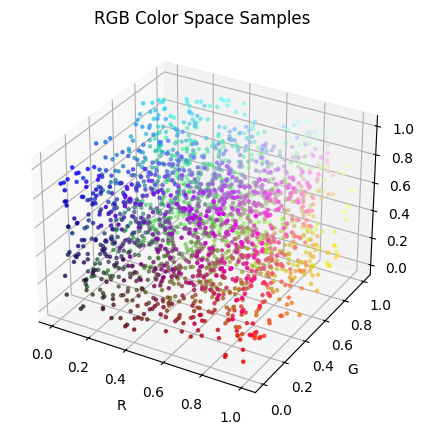

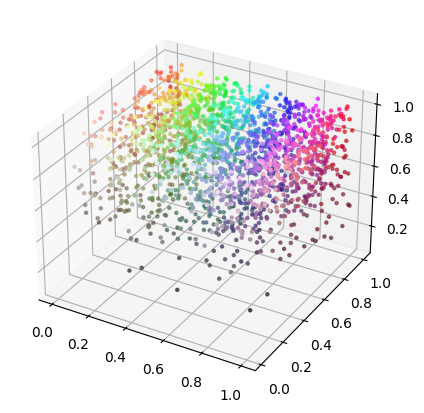

In [2]:
# Generate and visualize data
n_samples = 2000
batch_size = 64

# Create model
model = RGBtoHSV()
print("Model architecture:")
print(model)

# Training setup
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Prepare data
rgb_data = generate_rgb_samples(n_samples)
hsv_data = rgb_to_hsv_batch(rgb_data)

# Create dataset and dataloader
dataset = RGBHSVDataset(rgb_data, hsv_data)

train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Create and train model
model = RGBtoHSV()
train_model(model, train_loader, num_epochs=100)

visualize_model_structure(model)

visualize_samples(rgb_data)
visualize_hsv_samples(hsv_data)

## Filter RGB Data

In [3]:
center_color = np.random.uniform(0, 1, 3) 
percentage = 20

filtered_rgb, mask, threshold = filter_rgb_data(rgb_data, center_color, percentage)	

Kept 1600 samples (80.0%) outside radius 0.415 of [0.12483874 0.48862003 0.63271748]


Distance between colors: 0.0318


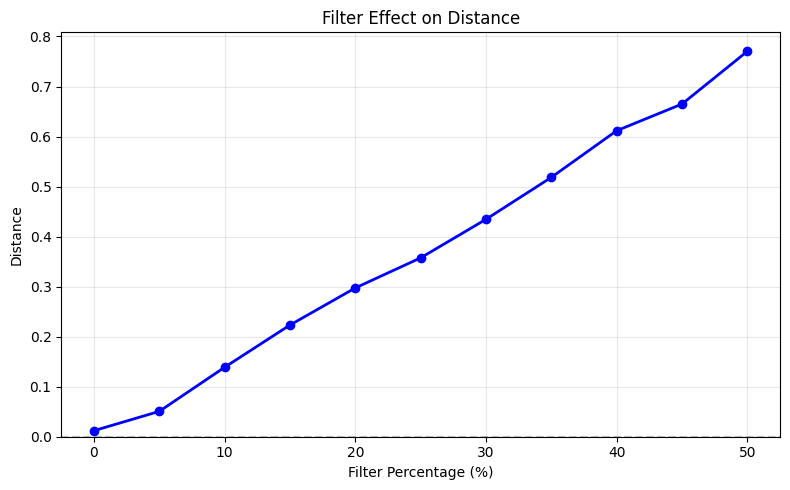

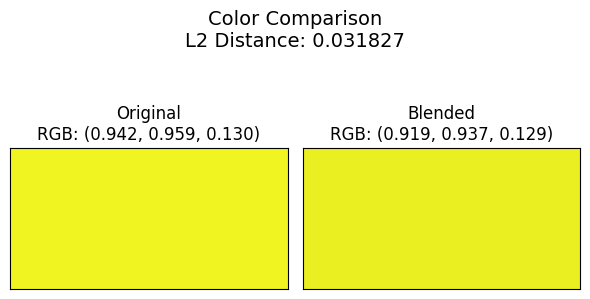

np.float64(0.03182691661953438)

In [4]:
center_color = np.random.uniform(0, 1, 3) 
neighbors, distances, indices = find_color_knn(center_color, filtered_rgb, k=25)
blended_color = blend_with_inverse_distance_weighting(neighbors, distances)

distance = color_l2_distance(center_color, blended_color)
print(f"Distance between colors: {distance:.4f}")

filter_percents, distances = test_single_center_color(rgb_data, center_color,k_neighbors=5, 
                           min_percent=0, max_percent=50, step_size=5)
simple_plot_filter_results(filter_percents, distances)

visualize_color_comparison(
    center_color, 
    blended_color, 
    color1_name="Original", 
    color2_name="Blended", 
    title="Color Comparison",
    show_title=True,
    show_distance=True
)

In [5]:
# Run the tests
filter_percents, all_distances, avg_distances, std_distances = test_multiple_center_colors(
    rgb_data,
    num_tests=20,          # Test 20 random center colors
    k_neighbors=10,        # Use 15 nearest neighbors for blending
    min_percent=0,         # Start at 0% filtering
    max_percent=50,        # Go up to 50% filtering
    step_size=5            # Test in steps of 5%
)

Testing 20 random center colors...
Test 1/20
Test 6/20
Test 11/20
Test 16/20
Test 20/20
Testing complete!


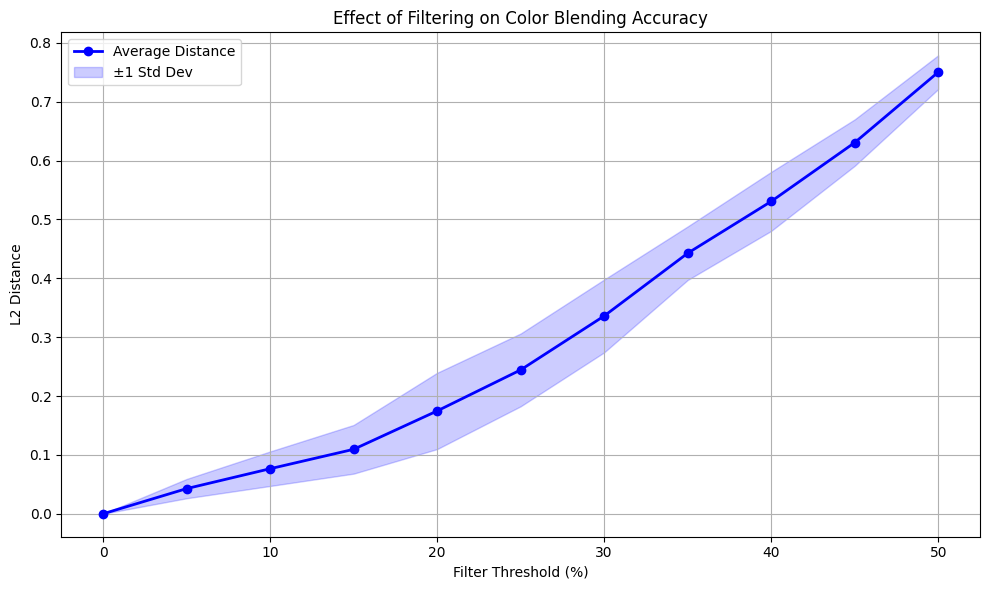

In [6]:
# Plot the results
plot_filter_test_results(filter_percents, avg_distances, std_distances)

### Test KNN amount differences

Test 1/100
Optimal number of neighbors: 18
Best distance: 0.018386
Optimal number of neighbors: 21
Best distance: 0.010941
Optimal number of neighbors: 12
Best distance: 0.003932
Optimal number of neighbors: 10
Best distance: 0.049460
Optimal number of neighbors: 3
Best distance: 0.016927
Test 6/100
Optimal number of neighbors: 4
Best distance: 0.010899
Optimal number of neighbors: 30
Best distance: 0.004606
Optimal number of neighbors: 10
Best distance: 0.004541
Optimal number of neighbors: 3
Best distance: 0.010995
Optimal number of neighbors: 13
Best distance: 0.015168
Test 11/100
Optimal number of neighbors: 6
Best distance: 0.006998
Optimal number of neighbors: 8
Best distance: 0.034716
Optimal number of neighbors: 7
Best distance: 0.006649
Optimal number of neighbors: 13
Best distance: 0.005998
Optimal number of neighbors: 10
Best distance: 0.007417
Test 16/100
Optimal number of neighbors: 8
Best distance: 0.084959
Optimal number of neighbors: 6
Best distance: 0.006998
Optimal nu

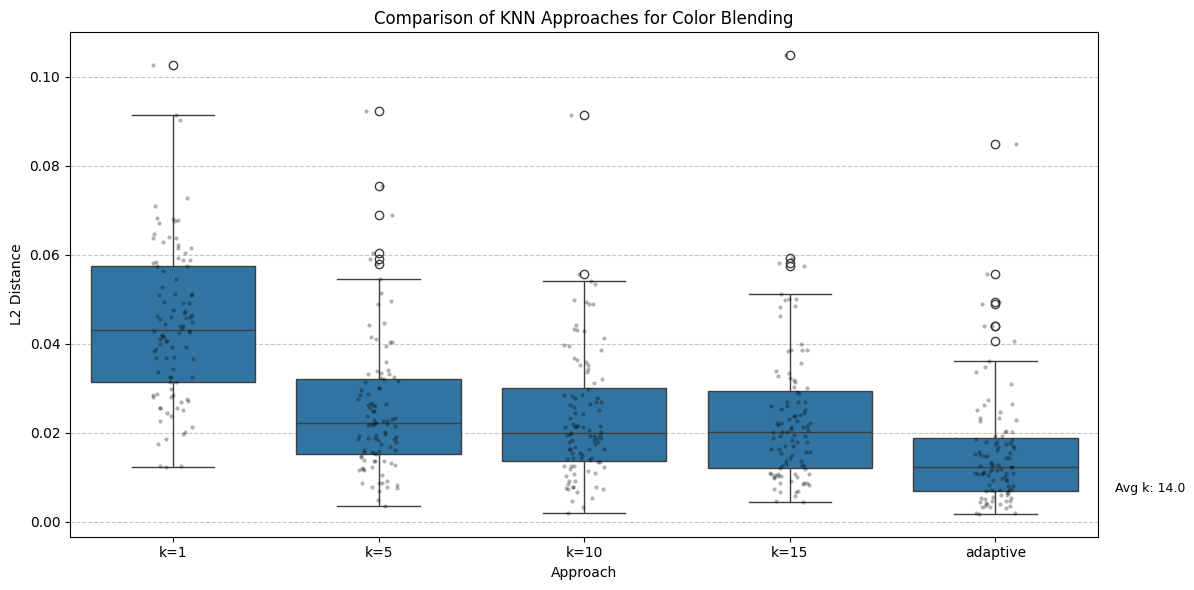


Approach Statistics:
--------------------------------------------------
Approach     Mean     Min      Max      Std Dev 
--------------------------------------------------
k=1          0.044418 0.012216 0.102649 0.017248
k=5          0.025620 0.003512 0.092230 0.015738
k=10         0.023546 0.001922 0.091465 0.014428
k=15         0.023310 0.004431 0.104851 0.015477
adaptive     0.015706 0.001758 0.084959 0.013124


In [7]:
# Test different KNN approaches
knn_results = test_multiple_knn_approaches(
    rgb_data,
    num_tests=100,              # Test 30 random center colors
    filter_percent=0.01,          # No filtering (adjust if needed)
    k_values=[1, 5, 10, 15],   # Fixed k values to test
    use_adaptive=True,         # Include adaptive approach
    adaptive_min_k=1,          # Min k for adaptive approach
    adaptive_max_k=30          # Max k for adaptive approach
)

# Plot the results
plot_knn_approach_comparison(knn_results)

### KNN with filtered 25%

Test 1/100
Optimal number of neighbors: 22
Best distance: 0.293693
Optimal number of neighbors: 15
Best distance: 0.111327
Optimal number of neighbors: 27
Best distance: 0.237336
Optimal number of neighbors: 28
Best distance: 0.222152
Optimal number of neighbors: 14
Best distance: 0.279203
Test 6/100
Optimal number of neighbors: 16
Best distance: 0.310139
Optimal number of neighbors: 11
Best distance: 0.224741
Optimal number of neighbors: 10
Best distance: 0.241211
Optimal number of neighbors: 28
Best distance: 0.105663
Optimal number of neighbors: 6
Best distance: 0.175126
Test 11/100
Optimal number of neighbors: 4
Best distance: 0.149351
Optimal number of neighbors: 2
Best distance: 0.182436
Optimal number of neighbors: 3
Best distance: 0.147661
Optimal number of neighbors: 4
Best distance: 0.307211
Optimal number of neighbors: 12
Best distance: 0.229342
Test 16/100
Optimal number of neighbors: 28
Best distance: 0.204767
Optimal number of neighbors: 2
Best distance: 0.063868
Optimal 

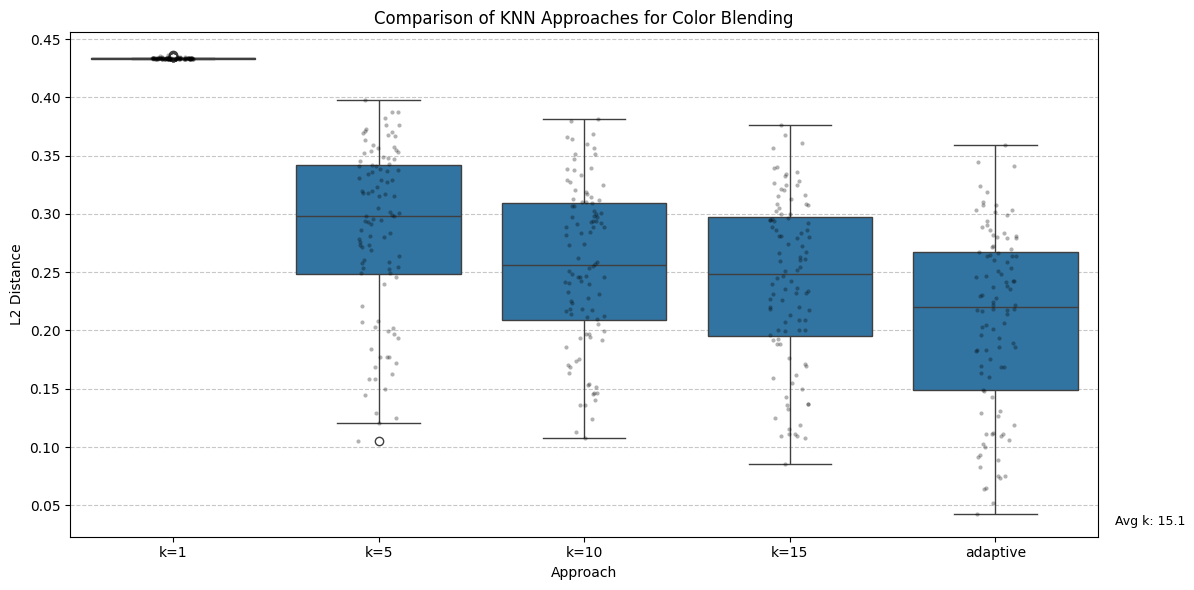


Approach Statistics:
--------------------------------------------------
Approach     Mean     Min      Max      Std Dev 
--------------------------------------------------
k=1          0.433426 0.433013 0.436058 0.000481
k=5          0.284446 0.104940 0.397775 0.073150
k=10         0.255850 0.107673 0.381347 0.068612
k=15         0.242021 0.085352 0.376209 0.071258
adaptive     0.208611 0.042742 0.358704 0.077300


In [8]:
# Test different KNN approaches
knn_results = test_multiple_knn_approaches(
    rgb_data,
    num_tests=100,              # Test 30 random center colors
    filter_percent=25,          # No filtering (adjust if needed)
    k_values=[1, 5, 10, 15],   # Fixed k values to test
    use_adaptive=True,         # Include adaptive approach
    adaptive_min_k=1,          # Min k for adaptive approach
    adaptive_max_k=30          # Max k for adaptive approach
)

# Plot the results
plot_knn_approach_comparison(knn_results)

## Collect inputs, activations and outputs

In [9]:
inputs, activations, outputs = collect_activations(model, train_loader)
print("Input shape:", inputs.shape)
print("Activation shape:", activations.shape)
print("Output shape:", outputs.shape)

Input shape: (2000, 3)
Activation shape: (2000, 640)
Output shape: (2000, 3)


### Generate new rgb sample and get input / activations / output

In [10]:
new_color = np.random.uniform(0, 1, 3) 
new_input, new_activations, new_output = collect_single_color_activations(model, new_color)

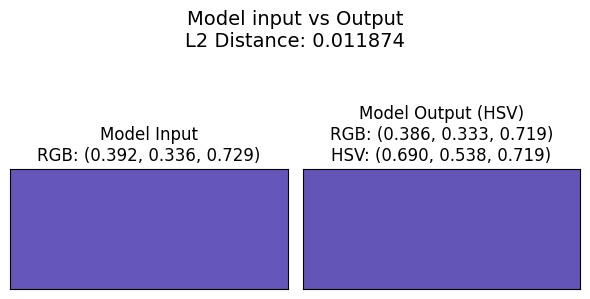

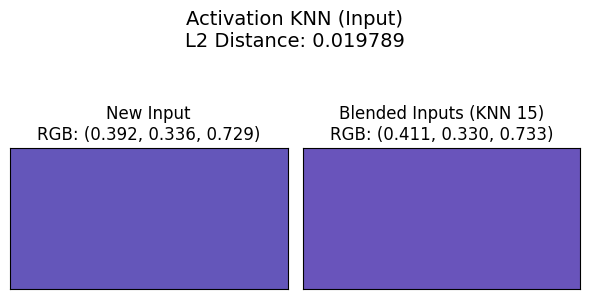

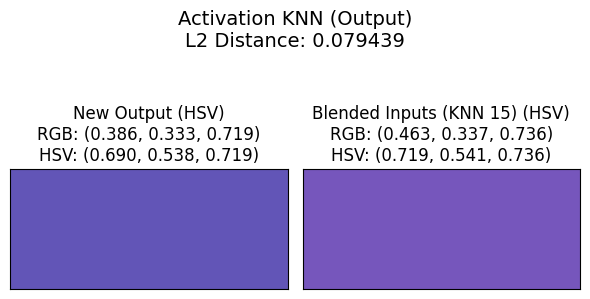

np.float32(0.079438835)

In [11]:
#model input vs model output
visualize_color_comparison(
    new_input[0], 
    new_output[0],
    color1_space='rgb',
    color2_space='hsv', 
    color1_name="Model Input", 
    color2_name="Model Output", 
    title="Model input vs Output",
    show_title=True,
    show_distance=True
)

neighbors, distances, indices = find_color_knn(new_input, inputs, k=15)
weights, distances = calculate_inverse_distance_weights(new_input, inputs, indices=indices)
blended_color = blend_with_custom_weights(inputs, indices=indices, weights=weights)

#closest sources activations - blended rgb 
visualize_color_comparison(
    new_input[0], 
    blended_color,
    color1_space='rgb',
    color2_space='rgb', 
    color1_name="New Input", 
    color2_name="Blended Inputs (KNN 15)", 
    title="Activation KNN (Input)",
    show_title=True,
    show_distance=True
)

neighbors, distances, indices = find_color_knn(new_output, outputs, k=15)
weights, distances = calculate_inverse_distance_weights(new_output, outputs, indices=indices)
blended_color = blend_with_custom_weights(outputs, indices=indices, weights=weights)

#closest sources activations - blended hsv 
visualize_color_comparison(
    new_output[0], 
    blended_color,
    color1_space='hsv',
    color2_space='hsv', 
    color1_name="New Output", 
    color2_name="Blended Inputs (KNN 15)", 
    title="Activation KNN (Output)",
    show_title=True,
    show_distance=True
)

Activation-based KNN excluded from evaluation
Evaluating 50 random colors with 4 k values...
Testing color 1/50
Testing color 6/50
Testing color 11/50
Testing color 16/50
Testing color 21/50
Testing color 26/50
Testing color 31/50
Testing color 36/50
Testing color 41/50
Testing color 46/50


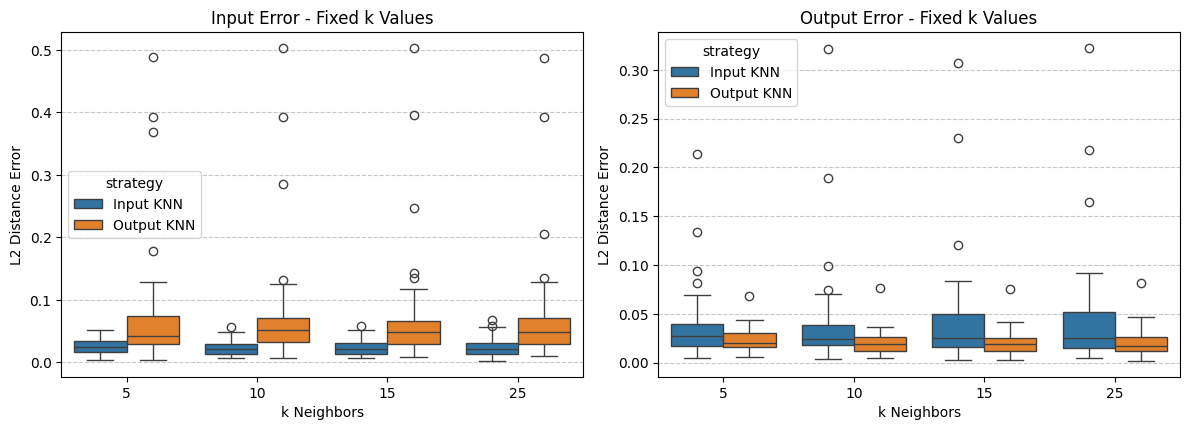

In [12]:
results_all = evaluate_knn_blending_strategies(
    model=model,
    inputs=inputs,
    activations=activations,
    outputs=outputs,
    num_tests=50,
    k_values=[5, 10, 15, 25],
    include_activation_knn=False,  # Include activation KNN (default)
    activation_neurons=640,
    use_adaptive=False,
    random_seed=42
)

c:\Users\Lukas\miniconda3\envs\ml_train\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Lukas\miniconda3\envs\ml_train\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Lukas\miniconda3\envs\ml_train\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Lukas\miniconda3\envs\ml_train\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Lukas\miniconda3\envs\ml_train\Lib\subprocess

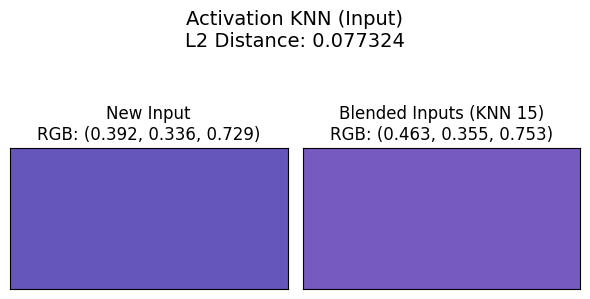

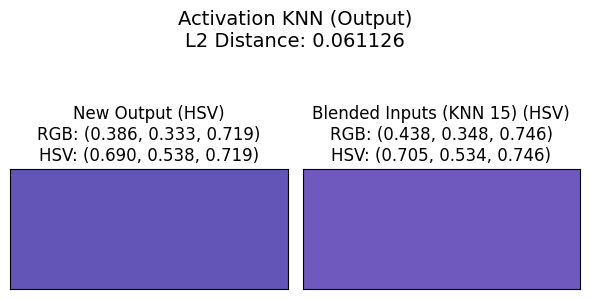

np.float32(0.061126497)

In [13]:
neighbors, distances, indices = find_color_knn(new_activations, activations, k=15)
weights, distances = calculate_inverse_distance_weights(new_activations, activations, indices=indices)
blended_color = blend_with_custom_weights(inputs, indices=indices, weights=weights)

#closest sources activations - blended rgb 
visualize_color_comparison(
    new_input[0], 
    blended_color,
    color1_space='rgb',
    color2_space='rgb', 
    color1_name="New Input", 
    color2_name="Blended Inputs (KNN 15)", 
    title="Activation KNN (Input)",
    show_title=True,
    show_distance=True
)

blended_color = blend_with_custom_weights(outputs, indices=indices, weights=weights)

#closest sources activations - blended hsv 
visualize_color_comparison(
    new_output[0], 
    blended_color,
    color1_space='hsv',
    color2_space='hsv', 
    color1_name="New Output", 
    color2_name="Blended Inputs (KNN 15)", 
    title="Activation KNN (Output)",
    show_title=True,
    show_distance=True
)

Using first 640 out of 640 total neurons for activation-based KNN
Evaluating 50 random colors with 4 k values...
Testing color 1/50
Testing color 6/50
Testing color 11/50
Testing color 16/50
Testing color 21/50
Testing color 26/50
Testing color 31/50
Testing color 36/50
Testing color 41/50
Testing color 46/50


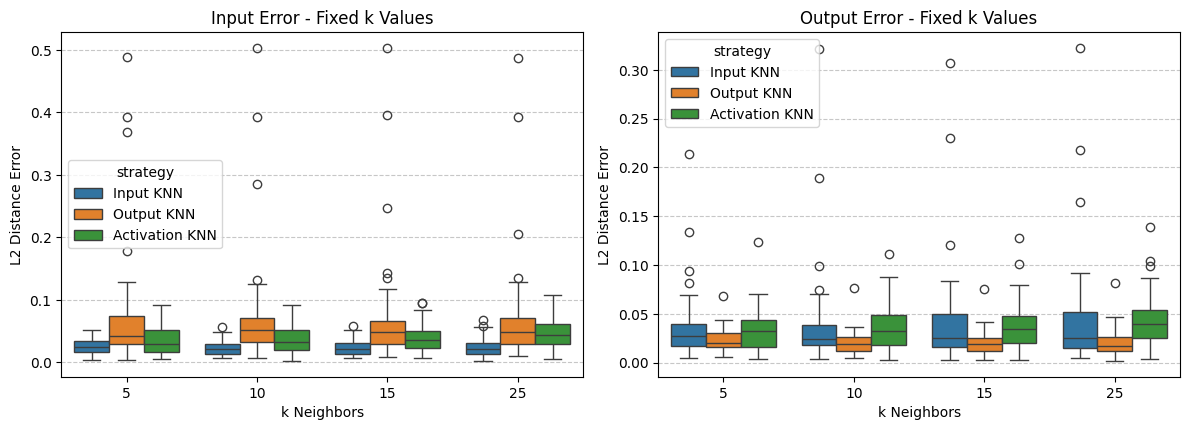

In [14]:
results_all = evaluate_knn_blending_strategies(
    model=model,
    inputs=inputs,
    activations=activations,
    outputs=outputs,
    num_tests=50,
    k_values=[5, 10, 15, 25],
    include_activation_knn=True,  # Include activation KNN (default)
    activation_neurons=640,
    use_adaptive=False,
    random_seed=42
)

### "EEG" of a network

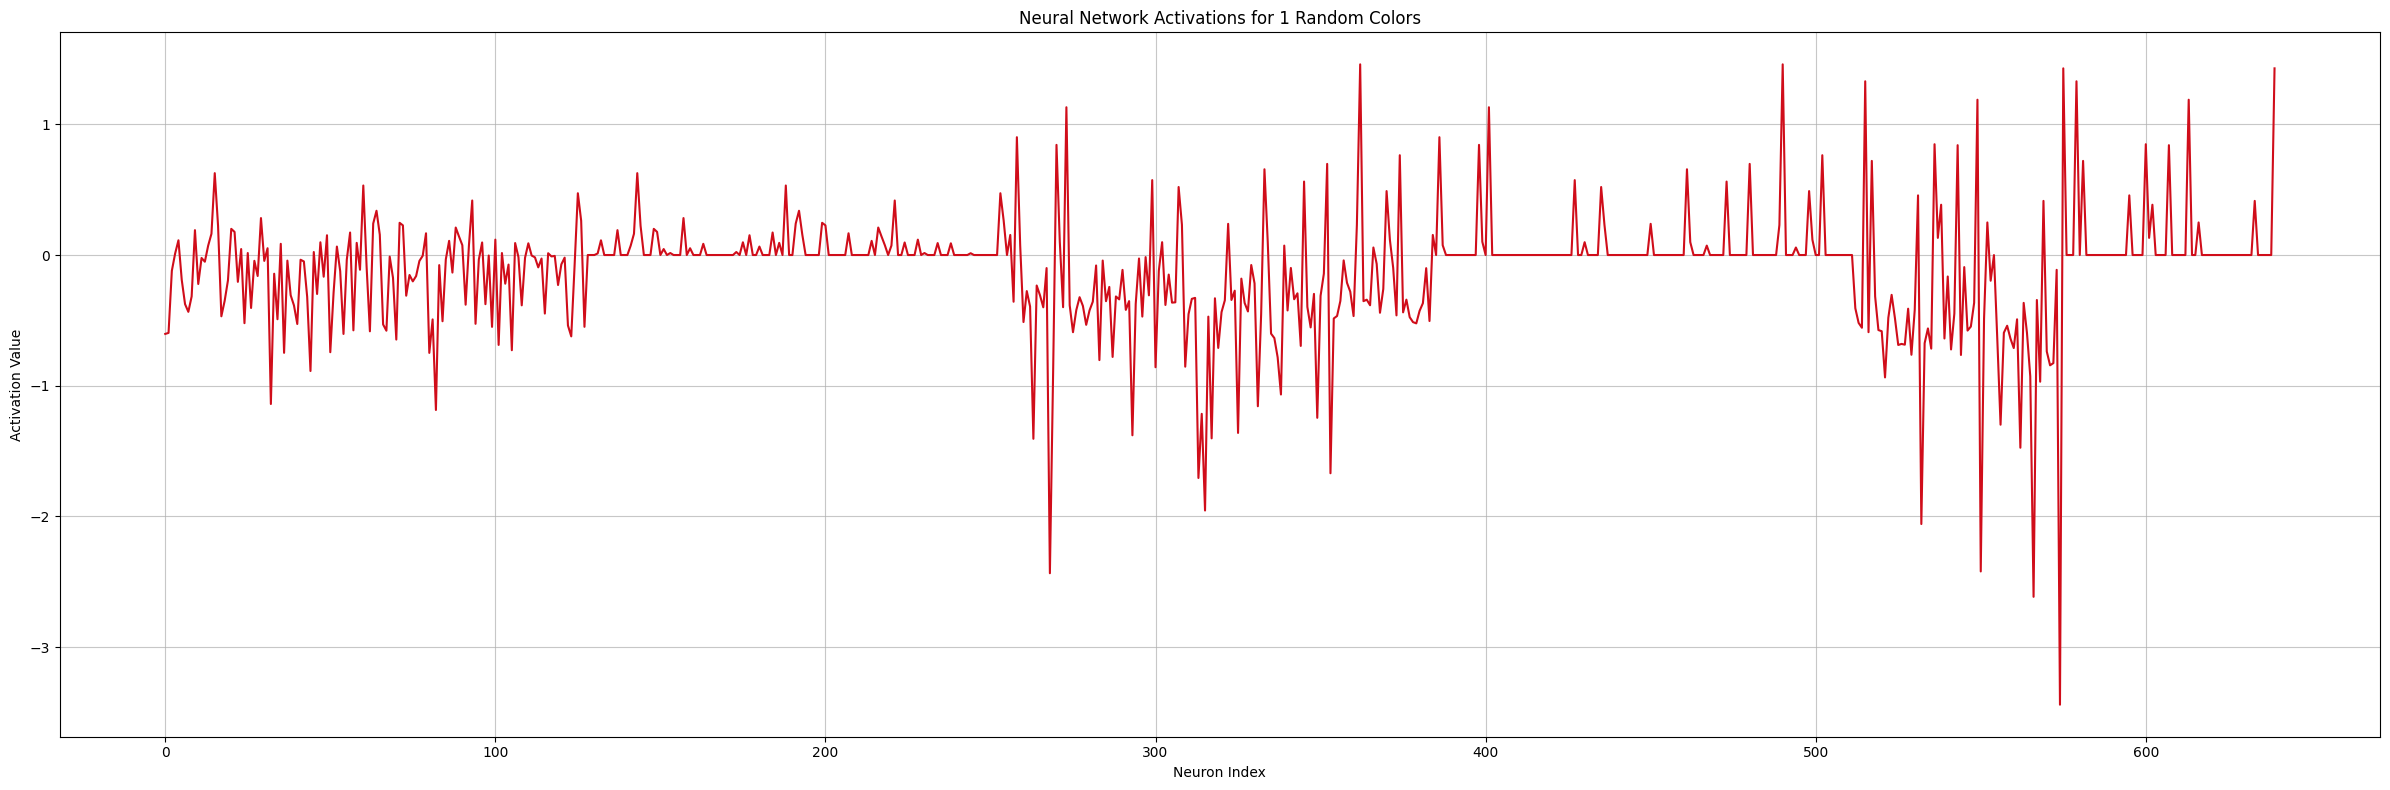

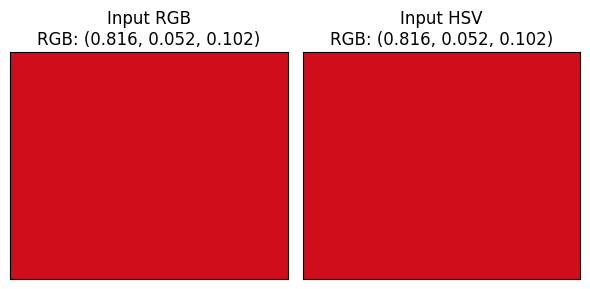

np.float32(0.0)

In [15]:
color_idx = 42  # Choose any specific index
plot_activations_line(activations[color_idx:color_idx+1], inputs[color_idx:color_idx+1], num_examples=1, figsize=(24, 8), alpha=1)

visualize_color_comparison(
    inputs[color_idx], 
    inputs[color_idx],
    color1_space='rgb',
    color2_space='rgb', 
    color1_name="Input RGB", 
    color2_name="Input HSV", 
    title="Model input vs Output",
    show_title=False,
    show_distance=True
)

Layer linear1: (2000, 128)
Layer relu2: (2000, 128)
Layer linear3: (2000, 128)
Layer relu4: (2000, 128)
Layer linear5: (2000, 64)
Layer relu6: (2000, 64)


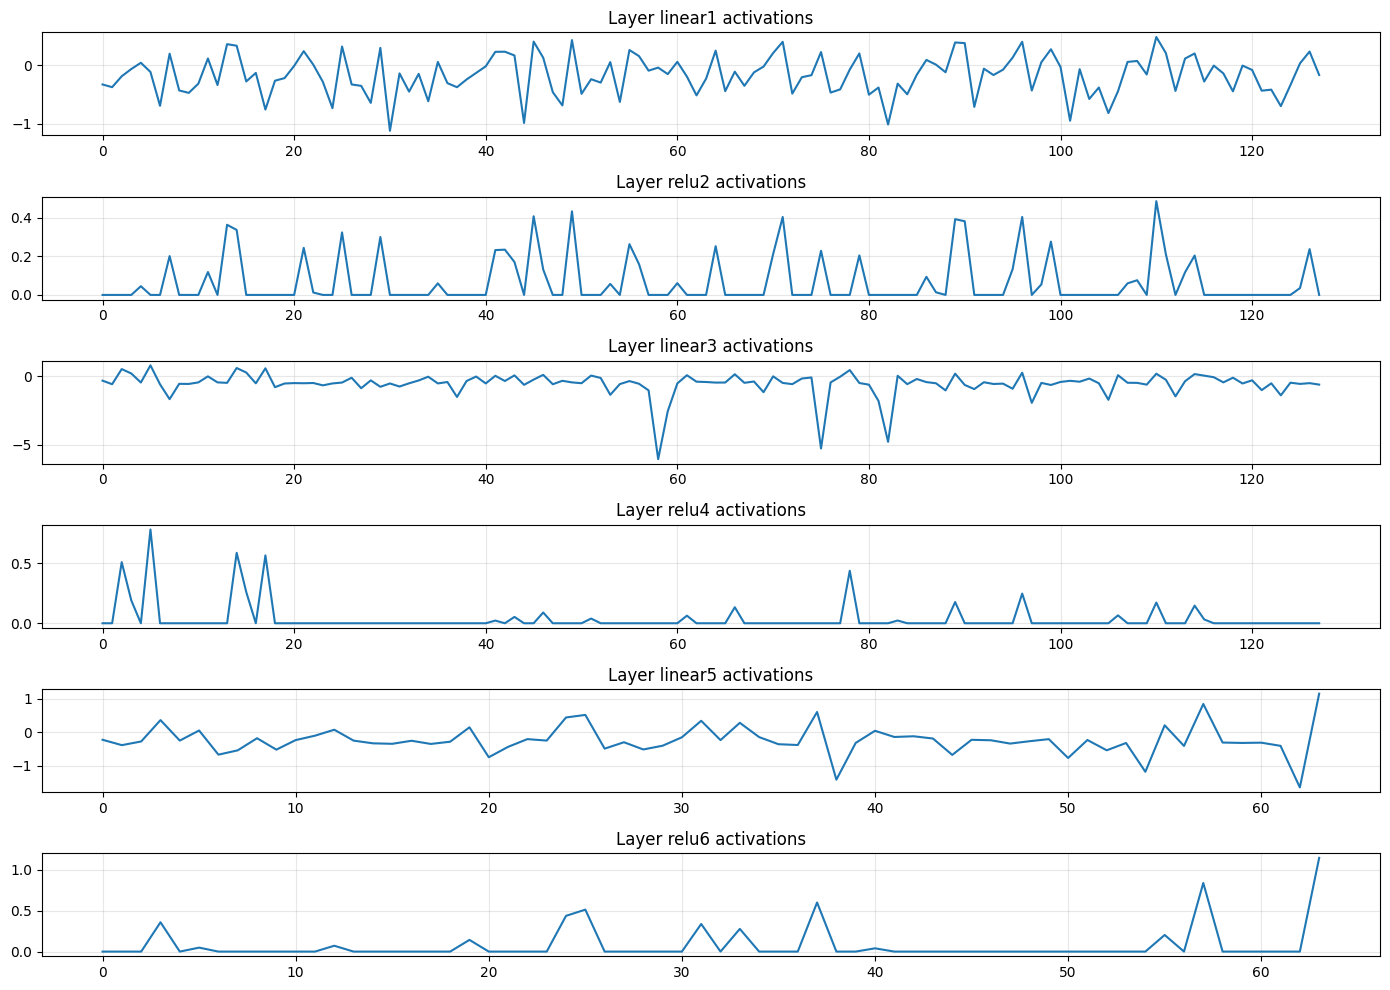

In [16]:
# For a batch of activations
layer_activations, layer_shapes = split_activations_by_layer(model, activations=activations)

# Print the shape of each layer's activations
for name, shape in layer_shapes.items():
    act_shape = layer_activations[name].shape
    print(f"Layer {name}: {act_shape}")

# Extract activations from specific layers
linear1_activations = layer_activations['linear1']
relu2_activations = layer_activations['relu2']

# For a single input's activation
_, new_activations, _ = collect_single_color_activations(model, new_color)
single_layer_acts, _ = split_activations_by_layer(model, single_activation=new_activations)

# Plot activations from different layers separately
plt.figure(figsize=(14, 10))
for i, (name, acts) in enumerate(single_layer_acts.items(), 1):
    plt.subplot(len(single_layer_acts), 1, i)
    plt.plot(acts)
    plt.title(f'Layer {name} activations')
    plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 2D Visual - 1 PCA Component

Layer linear1: 61.57% variance explained with 1 components
Layer relu2: 57.32% variance explained with 1 components
Layer linear3: 71.75% variance explained with 1 components
Layer relu4: 62.97% variance explained with 1 components
Layer linear5: 84.76% variance explained with 1 components
Layer relu6: 47.32% variance explained with 1 components


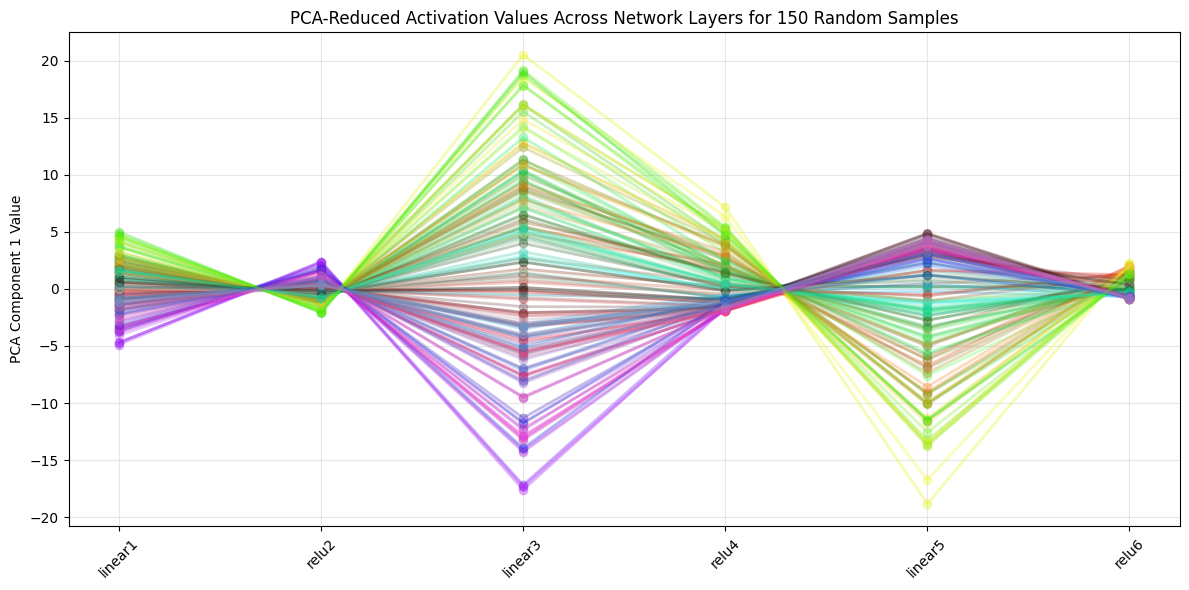

In [17]:
reduced_activations = apply_pca_to_layer_activations(layer_activations, n_components=1)

plot_pca_across_layers(reduced_activations, inputs, num_samples=150, alpha=0.3)

### 3D Visual - 2 PCA Components

In [18]:
# Apply PCA with 2 components (so we have two dimensions to plot)
reduced_activations = apply_pca_to_layer_activations(layer_activations, n_components=2)

# Create interactive 3D plot with 20 samples
plot_pca_3d_interactive(reduced_activations, inputs, num_samples=100, components=(0, 1),alpha=0.5)

Layer linear1: 84.85% variance explained with 2 components
Layer relu2: 73.63% variance explained with 2 components
Layer linear3: 94.28% variance explained with 2 components
Layer relu4: 80.42% variance explained with 2 components
Layer linear5: 92.13% variance explained with 2 components
Layer relu6: 64.16% variance explained with 2 components


### PCA Variance 

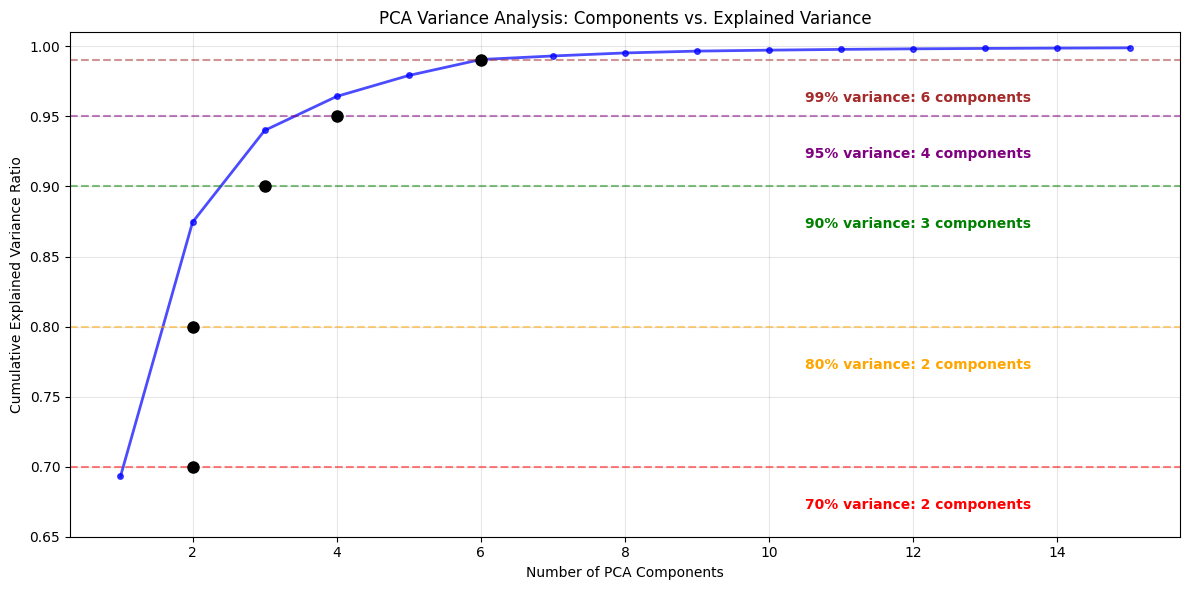

Original activation dimension: (1, 640)
Reduced dimension: (10,)
Reconstruction MSE: 0.000190


In [19]:
# For the variance analysis:
explained_variance, cumulative_variance = analyze_pca_variance(activations, max_components=15)

# To reduce dimensions of a new sample:
new_color = np.random.uniform(0, 1, 3)
_, new_activations, _ = collect_single_color_activations(model, new_color)
reduced_sample, pca_model = reduce_new_sample(activations, new_activations, n_components=10)

print("Original activation dimension:", new_activations.shape)
print("Reduced dimension:", reduced_sample.shape)

# Optionally, to reconstruct the original activation from the reduced representation:
reconstructed = reconstruct_from_reduced(reduced_sample, pca_model)
reconstruction_error = np.mean((new_activations - reconstructed)**2)
print(f"Reconstruction MSE: {reconstruction_error:.6f}")

### Comparison of different Metrics - Euclidean, Cosine, Mahalanobis

Dimensions have been randomly shuffled


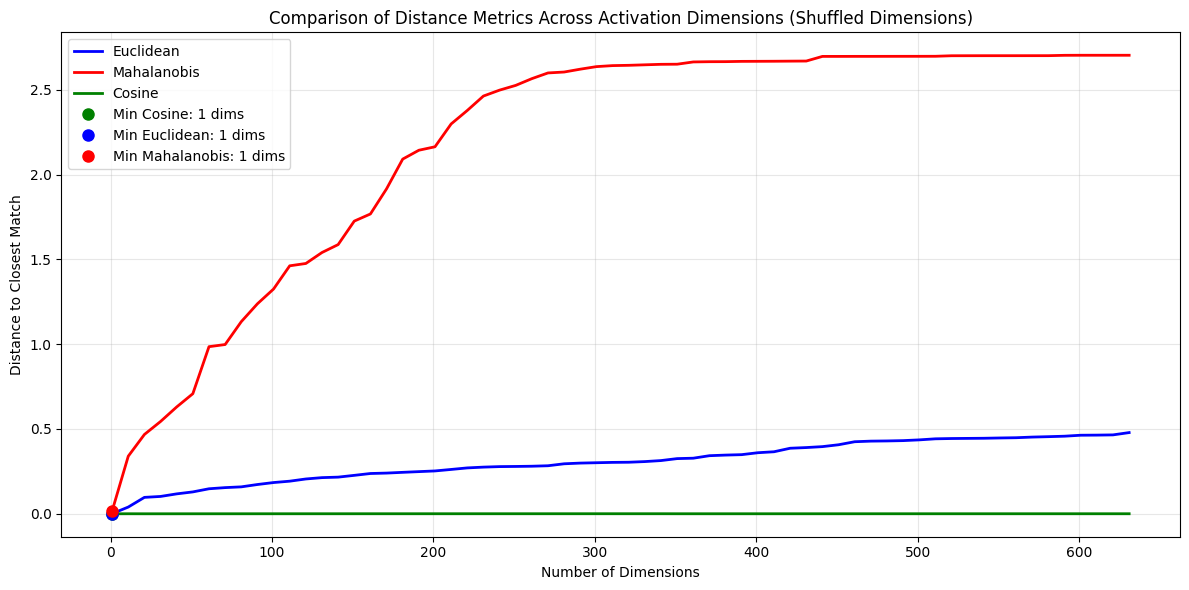

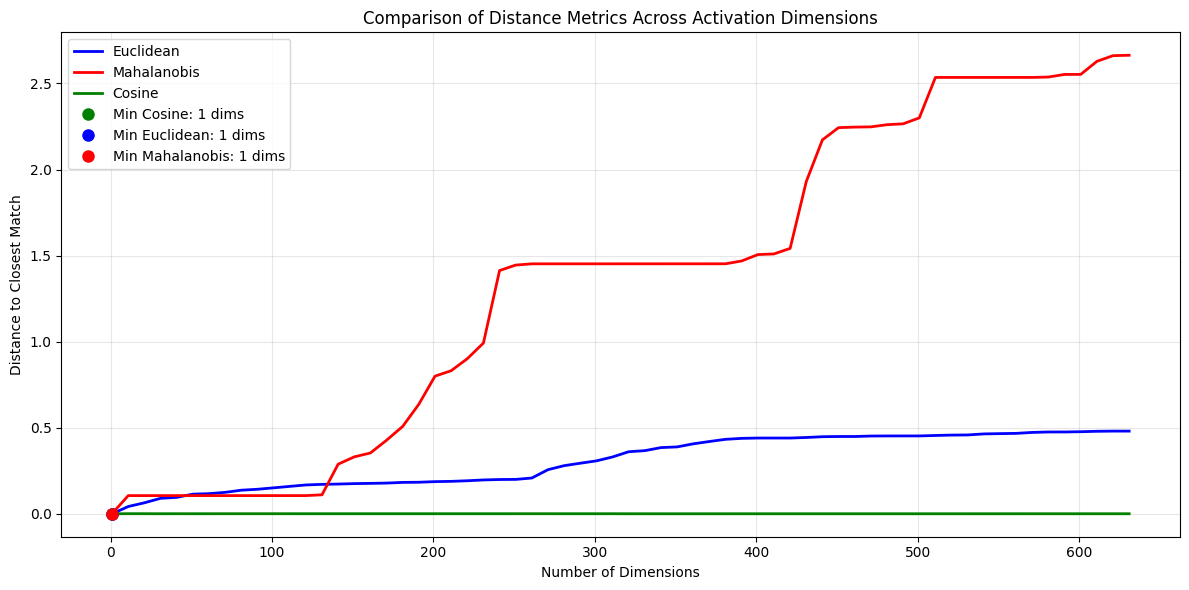

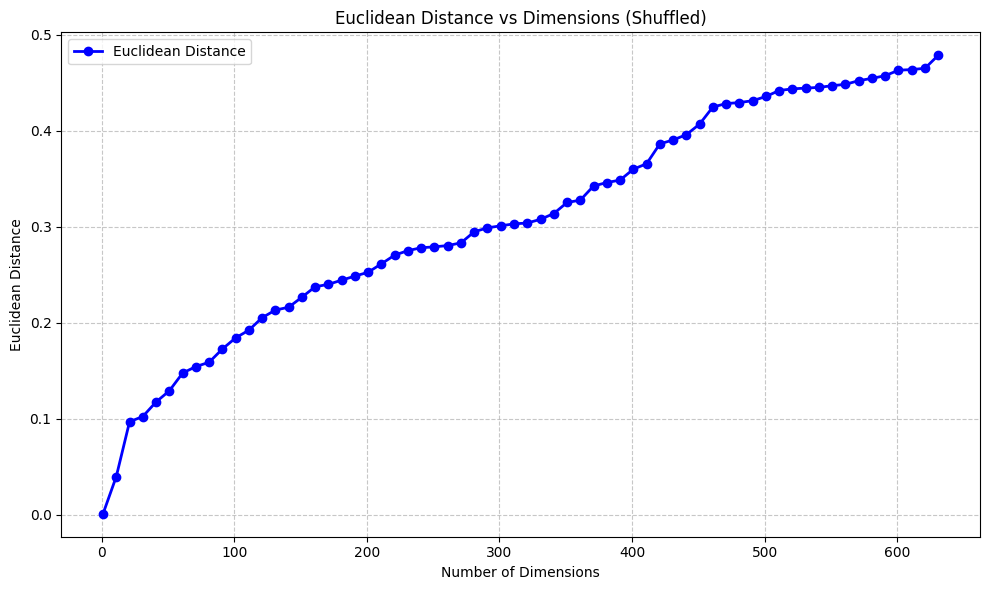

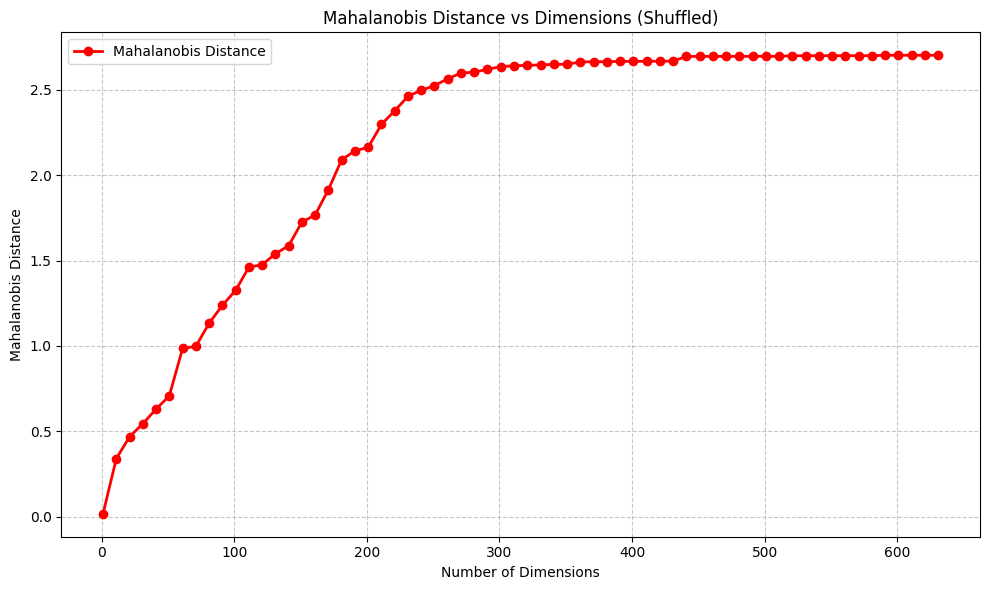

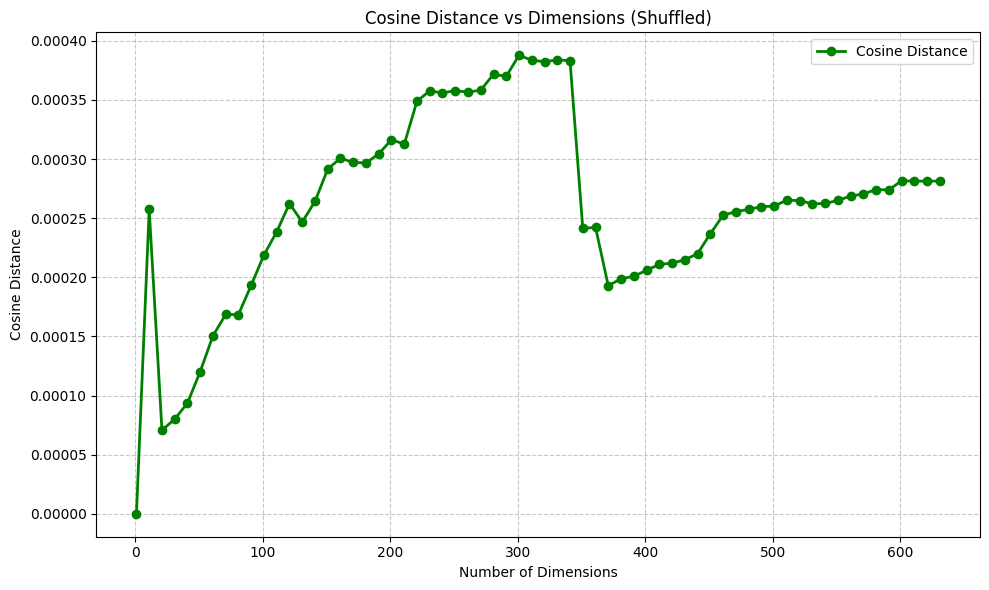

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Cosine Distance vs Dimensions (Shuffled)'}, xlabel='Number of Dimensions', ylabel='Cosine Distance'>)

In [20]:
# Calculate distances with shuffled dimensions
dimensions, euclidean_distances, mahalanobis_distances, cosine_distances, shuffled_indices = evaluate_shuffled_activation_distances(
    new_activations, activations, step_size=10, random_seed=12
)

# Plot the results with all three distance metrics (shuffled dimensions)
plot_distance_comparison(
    dimensions, 
    euclidean_distances, 
    mahalanobis_distances,
    cosine_distances,
    shuffled=True
)

# For comparison, also plot the original (unshuffled) results
org_dimensions, org_euclidean, org_mahalanobis, org_cosine = evaluate_activation_distances(
    new_activations, activations, step_size=10
)

plot_distance_comparison(
    org_dimensions, 
    org_euclidean, 
    org_mahalanobis,
    org_cosine,
    shuffled=False
)

# Plot with different colors
plot_distance_metric(dimensions, euclidean_distances, metric_name='Euclidean', 
                    shuffled=True, color='blue')

plot_distance_metric(dimensions, mahalanobis_distances, metric_name='Mahalanobis', 
                    shuffled=True, color='red')

plot_distance_metric(dimensions, cosine_distances, metric_name='Cosine', 
                    shuffled=True, color='green')